<a href="https://colab.research.google.com/github/Jonuxs/AdvancedDataScienceCapstone/blob/main/FeatureCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Description

This id feature engineering notebooks.
In this notebook we will use the following techniques:
1. TF-IDF
2. TF-IDF with PCA
3. Word2Vec

Also, we will encode the objective (y).

# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Imports

In [ ]:
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# 3. Paths and variables

In [ ]:
pathToEtlData = "/content/drive/My Drive/Side Projects/FinancialNewsSentiment/spamETL.csv"

# 4. Adapt dataframe into suitable format

In [ ]:
dataETL = pd.read_csv(pathToEtlData)

In [ ]:
dataETL

,label,textLemmatized
0,ham,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,ham,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,spam,"['free', 'entri', 'wkli', 'comp', 'win', 'fa',..."
3,ham,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,ham,"['nah', 'think', 'go', 'usf', 'life', 'around'..."
...,...,...
5567,spam,"['2nd', 'time', 'tri', 'contact', 'u', 'u', 'p..."
5568,ham,"['ü', 'b', 'go', 'esplanad', 'fr', 'home']"
5569,ham,"['piti', 'mood', 'suggest']"
5570,ham,"['guy', 'bitch', 'act', 'like', 'interest', 'b..."


In [ ]:
if(isinstance(dataETL['textLemmatized'][0], str)):
  dataETL['textLemmatized'] = dataETL.apply(lambda row:  row['textLemmatized'].strip('[]').replace('"', '').replace(' ', '').replace("'", '').split(',')   , axis=1)
  print("Changed format to list!")
elif(isinstance(dataETL['textLemmatized'][0], list)):
  print("Everything is fine!")
else:
  raise Exception("Incorrect column format")

Changed format to list!


In [ ]:
dataETL["text"] = dataETL.apply(lambda x: ' '.join(x["textLemmatized"]), axis = 1)

In [ ]:
dataETL

,label,textLemmatized,text
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt 21st...
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"[nah, think, go, usf, life, around, though]",nah think go usf life around though
...,...,...,...
5567,spam,"[2nd, time, tri, contact, u, u, pound, prize, ...",2nd time tri contact u u pound prize claim eas...
5568,ham,"[ü, b, go, esplanad, fr, home]",ü b go esplanad fr home
5569,ham,"[piti, mood, suggest]",piti mood suggest
5570,ham,"[guy, bitch, act, like, interest, buy, someth,...",guy bitch act like interest buy someth els nex...


# 5. Encode objective (y)

In [ ]:
labArr = np.unique(dataETL["label"].values)
labArr

array(['ham', 'spam'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(list(labArr))

LabelEncoder()

In [ ]:
list(le.classes_)

['ham', 'spam']

In [ ]:
encodedLabels = np.reshape(le.transform(dataETL["label"]),[len(le.transform(dataETL["label"])),1] )

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
np.save("/content/drive/My Drive/Side Projects/FinancialNewsSentiment/y.npy", enc.fit_transform(encodedLabels).toarray())

# 6. TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
tfIdfData = vectorizer.fit_transform(dataETL["text"])

In [ ]:
firstEntry = tfIdfData.toarray()[0]

In [ ]:
for i in firstEntry:
  if(i != 0):
    print(i)

0.3510905115515307
0.2626042526569438
0.3351538433013339
0.2966026829110633
0.2966026829110633
0.271895433226479
0.1383876029873381
0.16459256712358958
0.19394259202399278
0.3510905115515307
0.2966026829110633
0.2397320241173673
0.19394259202399278
0.23536033833671008


In [ ]:
TfIdfDf = pd.DataFrame(data = tfIdfData.toarray())

In [ ]:
TfIdfDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6662,6663,6664
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.250002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
TfIdfDf.to_csv("/content/drive/My Drive/Side Projects/FinancialNewsSentiment/tfIdfall.csv", index = False)

# 7. TF_IDF with PCA

In [ ]:
pca = PCA(n_components=50)
TfIdfDfPCA = pca.fit_transform(TfIdfDf)

In [ ]:
TfIdfDfPCADf = pd.DataFrame(TfIdfDfPCA)

In [ ]:
TfIdfDfPCADf.to_csv("/content/drive/My Drive/Side Projects/FinancialNewsSentiment/tfIdfPca.csv", index = False)

In [ ]:
pca.components_

array([[-9.30876542e-05, -5.22906558e-05,  8.85883367e-04, ...,
         2.92502366e-04, -5.27819031e-05, -1.86283673e-04],
       [-9.98198167e-05, -3.13674370e-04,  4.85563196e-05, ...,
         1.26453373e-05, -1.18867222e-04, -2.66150628e-04],
       [-5.95787773e-05, -4.76593969e-04, -2.43405934e-04, ...,
        -7.85007029e-05, -1.66738724e-04, -2.38409413e-04],
       ...,
       [-3.09607858e-04, -6.20861178e-04, -1.65944644e-03, ...,
        -2.75848712e-04, -8.33219027e-04, -2.57513926e-04],
       [-5.24291725e-05,  1.87823012e-03, -1.29281133e-03, ...,
         7.96657515e-04, -1.19621398e-03, -8.40812082e-04],
       [ 4.26040634e-04,  1.97828046e-03,  3.21660346e-03, ...,
         1.57081463e-04,  4.46640824e-04,  1.13589622e-03]])

In [ ]:
pca.n_features_

6665

In [ ]:
pca.n_samples_

5572

# 8. Word2Vec

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/Side Projects/FinancialNewsSentiment/GoogleNews-vectors-negative300.bin', binary = True) 

In [ ]:
model.vector_size

300

In [ ]:
dataETL["textInModel"] = dataETL.apply(lambda x: [word for word in x["textLemmatized"] if word in model.vocab], axis = 1)

In [ ]:
dataETL

,label,textLemmatized,text,textInModel
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...,"[go, point, avail, n, great, world, la, e, buf..."
1,ham,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt 21st...,"[free, comp, win, fa, cup, final, may, text, f..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say,"[u, dun, say, hor, u, c, say]"
4,ham,"[nah, think, go, usf, life, around, though]",nah think go usf life around though,"[nah, think, go, usf, life, around, though]"
...,...,...,...,...
5567,spam,"[2nd, time, tri, contact, u, u, pound, prize, ...",2nd time tri contact u u pound prize claim eas...,"[2nd, time, tri, contact, u, u, pound, prize, ..."
5568,ham,"[ü, b, go, esplanad, fr, home]",ü b go esplanad fr home,"[ü, b, go, fr, home]"
5569,ham,"[piti, mood, suggest]",piti mood suggest,"[mood, suggest]"
5570,ham,"[guy, bitch, act, like, interest, buy, someth,...",guy bitch act like interest buy someth els nex...,"[guy, bitch, act, like, interest, buy, els, ne..."


## Check basic statistics of cleaned (stemmed words and words that are in the vector model)

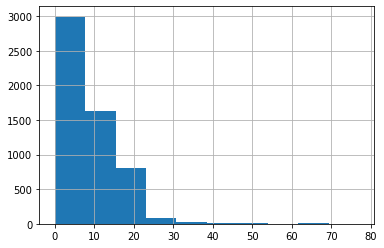

In [ ]:
dataETL["textLength"] = dataETL.apply(lambda x: len(x.text.split()), axis = 1 )
dataETL["textLength"].hist()

In [ ]:
np.mean(dataETL["textLength"])

9.028176597272074

In [ ]:
np.std(dataETL["textLength"])

6.751439934077595

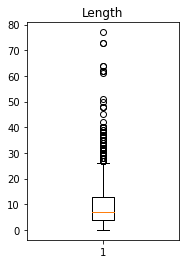

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.boxplot(dataETL["textLength"])
ax1.set_title('Length')
plt.show()

## Create ans save word embedding dataset

For words embeddings, I have set a number of embedded words per text to 15 becasue it is a mean + 1 std.

In [ ]:
tokens = dataETL["textInModel"].values

In [ ]:
zeroArr = np.zeros([300])

In [ ]:
i = 0
sentenceEmbedding = []
for j in range(min(14, len(tokens[i]))):
  sentenceEmbedding.append(model[tokens[i][j]])
for k in range(j,14,1):
  sentenceEmbedding.append(zeroArr)

In [ ]:
embeddingDataset = []
for i in range(tokens.shape[0]):
  sentenceEmbedding = []
  for j in range(min(15, len(tokens[i]))):
    sentenceEmbedding.append(model[tokens[i][j]])
  while(len(sentenceEmbedding)!= 15):
    sentenceEmbedding.append(zeroArr)
  if(np.array(sentenceEmbedding).shape[0] != 15):
    print(np.array(sentenceEmbedding).shape)
    print(i)
    print(j)
  embeddingDataset.append(sentenceEmbedding)

In [ ]:
embeddingDataset = np.array(embeddingDataset)

In [ ]:
embeddingDataset.shape

(5572, 15, 300)

In [ ]:
np.save("/content/drive/My Drive/Side Projects/FinancialNewsSentiment/wordEmbeddings.npy",embeddingDataset)